In [26]:
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [27]:
target = pd.read_csv('../input/train.csv.zip',usecols=['target'],squeeze=True)

In [30]:
lgb_valid = pd.read_csv("valid-lgb-opt.csv")
nn_valid = pd.read_csv("valid-nn-opt-fix.csv")

In [31]:
lgb_test = pd.read_csv("submit-lgb-opt.csv")
nn_test = pd.read_csv("submit-nn-opt-fix.csv")

In [32]:
X_valid = np.hstack( [lgb_valid[["target"]], nn_valid[["target"]]] )
X_test = np.hstack( [lgb_test[["target"]], nn_test[["target"]]] )


In [33]:
target.std()

3.850499995486051

In [34]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_valid, target)

lr.coef_

array([0.78902087, 1.07951534])

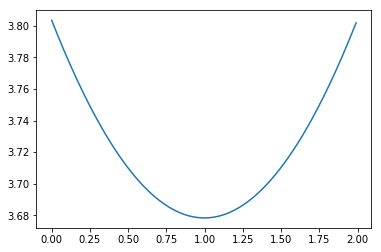

In [35]:
coeff = []
err = []

for ip in range(200):
    icoeff = ip*0.01
    icoeffs = np.array([icoeff,1.-icoeff]).reshape(1,2)
    ipred = (X_valid*icoeffs).sum(axis=1)
    coeff.append(icoeff)
    err.append( np.sqrt(((ipred-target)**2).mean()) )

plt.plot(coeff,err)

In [36]:
np.array(err).argmin(), min(err)

(100, 3.678452460571987)

In [37]:
predict = lr.predict(X_valid)

In [38]:
np.sqrt( ((predict-target)**2).mean() )

3.6745055481431383

In [39]:
(lgb_valid["target"]-target).std()

3.67846150341511

In [40]:
(nn_valid["target"]-target).std()

3.7819443352190865

In [41]:
# submit = lr.predict(X_test)

submit = 0.49 * nn_test["target"] + 0.51*lgb_test["target"]

In [42]:
submit_df = pd.DataFrame({"card_id":nn_test["card_id"], "target":submit})

In [43]:
submit_df.to_csv("submit-cmb-lb.csv",index=False)

In [44]:
predict[:10]

array([-0.29908119, -0.23862228,  0.50345484,  0.15485452, -0.06757754,
       -1.1005195 , -0.17299828,  0.29350144,  0.65611752,  0.26809037])

In [45]:
target[:10]

0   -0.820283
1    0.392913
2    0.688056
3    0.142495
4   -0.159749
5    0.871585
6    0.230129
7    2.135850
8   -0.065406
9    0.300062
Name: target, dtype: float64